# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url="https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
html=browser.html


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup= BeautifulSoup(html,'html.parser')

In [5]:
# Extract all rows of data
tables=soup.find_all('tr',class_='data-row')
tables

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
table_data=[]

# Loop through the scraped data to create a list of rows
for table in tables:
    data = table.find_all('td')
    table = [d.text for d in data]
    table_data.append(table)

In [7]:
table_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df= pd.DataFrame(table_data,columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])



In [9]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
data_types= mars_df.dtypes
data_types

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis using dictionary method
convert_units= {'id':int,'sol':int,'ls':int,'month':int,'min_temp':float,'pressure':float}
mars_df_updated= mars_df.astype(convert_units)
mars_df_updated['terrestrial_date']=pd.to_datetime(mars_df_updated['terrestrial_date'])
mars_df_updated


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [12]:
# Confirm type changes were successful by examining data types again
mars_df_updated.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
month_count=mars_df_updated["month"].unique()
count_m= len(month_count)
print(f"There are {count_m} months in Mars")

There are 12 months in Mars


In [14]:
# 2. How many Martian days' worth of data are there?
max_days= mars_df_updated["sol"].nunique()
print(f"There are {max_days} Martian days in the dataset")

There are 1867 Martian days in the dataset


In [15]:
# 3. What is the average low temperature by month?
month_temp= mars_df_updated.groupby("month").mean()
month_temp= month_temp[["min_temp"]].reset_index('month')
month_temp

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


Text(0.5, 1.0, 'Average temp in Cels ° by Month')

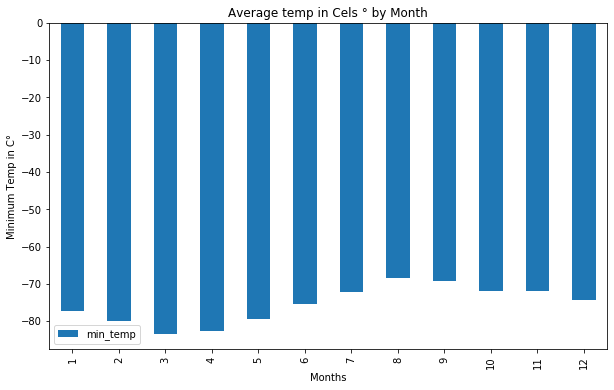

In [16]:
# Plot the average temperature by month
month_temp.plot(kind="bar",x="month",y="min_temp",figsize=(10,6))
plt.ylabel("Minimum Temp in C°")
plt.xlabel("Months")
plt.title("Average temp in Cels ° by Month")

In [17]:
# Identify the coldest and hottest months in Curiosity's location
min_temp= month_temp["min_temp"].min()
max_temp=month_temp["min_temp"].max()
mint_month= month_temp.loc[month_temp["min_temp"] == min_temp,'month'].values[0]
maxt_month= month_temp.loc[month_temp['min_temp']== max_temp,'month'].values[0]

print(f"The coldest month is: {mint_month} with the coldest temp of: {min_temp} °degree Celsius.")
print(f"The coldest month is: {maxt_month} with the coldest temp of: {max_temp} °degree Celsius.")

The coldest month is: 3 with the coldest temp of: -83.30729166666667 °degree Celsius.
The coldest month is: 8 with the coldest temp of: -68.38297872340425 °degree Celsius.


In [18]:
# 4. Average pressure by Martian month
month_p= mars_df_updated.groupby("month").mean()
month_p= month_p[["pressure"]].reset_index()
month_p

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


Text(0.5, 1.0, 'Average atmospheric pressure of Curiousity by Month')

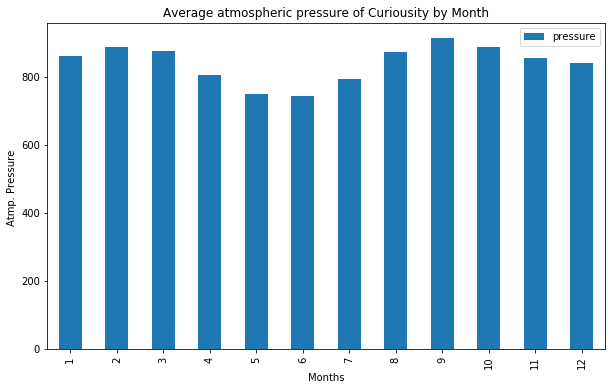

In [19]:
# Plot the average pressure by month
month_p.plot(kind='bar',x='month',y="pressure",figsize=(10,6))
plt.ylabel("Atmp. Pressure ")
plt.xlabel("Months")
plt.title("Average atmospheric pressure of Curiousity by Month")

In [20]:
# Lowest and Highest atmospheric pressure by day
min_p= month_p["pressure"].min()
max_p= month_p["pressure"].max()
minp_month= month_p.loc[month_p["pressure"] == min_p,'month'].values[0]
maxp_month= month_p.loc[month_p["pressure"]== max_p,'month'].values[0]

print(f"The month with the lowest atm. pressure is: {minp_month} with the lowest pressure of: {round(min_p,2)}.")
print(f"The month with the highest atm. pressure is: {maxp_month} with the highest pressure of: {round(max_p,2)}.")


The month with the lowest atm. pressure is: 6 with the lowest pressure of: 745.05.
The month with the highest atm. pressure is: 9 with the highest pressure of: 913.31.


In [21]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# find the starting solar longitude
start_ls = mars_df_updated['ls'].loc[0]


# find df that has the same 155 ls
same_start_ls = mars_df_updated.loc[mars_df_updated['ls']==start_ls]
#  find two dates that has 155 as ls
start_date = same_start_ls['terrestrial_date'].loc[0]
end_date= same_start_ls['terrestrial_date'].iloc[1]
# find date variance to find the terrestrial days
T_D= end_date-start_date
print(f"There are {T_D} days that makes up a single Mars year.")

There are 686 days 00:00:00 days that makes up a single Mars year.


The distance between first peak (115 days) and second peak (755) looks be 640 days
This peak to peak comparison can be used to determine the rough estimate of Terrestrial days.


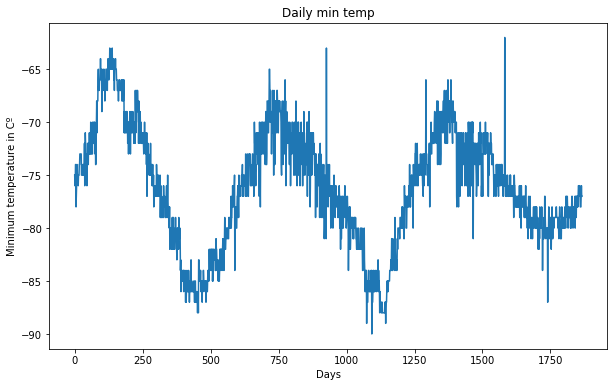

In [22]:
# Visually estimate the result by plotting the daily minimum temperature.
x= mars_df_updated['sol']
y= mars_df_updated['min_temp']
y.plot(x=x,y=y,figsize=(10,6))
plt.ylabel("Minimum temperature in Cº")
plt.xlabel("Days")
plt.title("Daily min temp")
print(f"The distance between first peak (115 days) and second peak (755) looks be 640 days")
print(f"This peak to peak comparison can be used to determine the rough estimate of Terrestrial days.")

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
mars_df_updated.to_csv("Mars_Temp_Analysis.csv",encoding='utf-8',index=False)

In [24]:
browser.quit()